In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

/Users/vaishnaviputcha/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = pd.read_csv('politics.csv')

In [3]:
data.head()

,ups,title,subreddit,url
0,39139,Marjorie Taylor Greene backs away from QAnon h...,politics,https://www.independent.co.uk/news/world/ameri...
1,32551,Gov. Greg Abbott said Texas 'desperately needs...,politics,https://www.businessinsider.com/greg-abbott-sa...
2,17978,If the Supreme Court strikes down student-loan...,politics,https://www.businessinsider.com/supreme-court-...
3,6297,Texas Democrat calls for US authorities to ext...,politics,https://thehill.com/policy/international/38048...
4,3935,Michigan attorney general re-opens criminal pr...,politics,https://www.cnn.com/2023/01/06/politics/michig...


In [4]:
#https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in data['title']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:5])

[{'neg': 0.059, 'neu': 0.941, 'pos': 0.0, 'compound': -0.0516, 'headline': 'Marjorie Taylor Greene backs away from QAnon history saying she got ‘sucked into some things I’d seen on the internet’'}, {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.3818, 'headline': "Gov. Greg Abbott said Texas 'desperately needs more money' to address the border after spending millions on busing migrants to other parts of the country"}, {'neg': 0.149, 'neu': 0.556, 'pos': 0.295, 'compound': 0.4939, 'headline': "If the Supreme Court strikes down student-loan forgiveness, it could have 'startling implications,' Biden says — and set a strange legal precedent going forward"}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Texas Democrat calls for US authorities to extradite Bolsonaro back to Brazil'}, {'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'compound': -0.7579, 'headline': 'Michigan attorney general re-opens criminal probe into fake electors for Trump'}]


In [5]:
df = pd.DataFrame.from_records(results)
merged_df = pd.concat([df, data['subreddit']], axis =1)
merged_df

,neg,neu,pos,compound,headline,subreddit
0,0.059,0.941,0.000,-0.0516,Marjorie Taylor Greene backs away from QAnon h...,politics
1,0.098,0.902,0.000,-0.3818,Gov. Greg Abbott said Texas 'desperately needs...,politics
2,0.149,0.556,0.295,0.4939,If the Supreme Court strikes down student-loan...,politics
3,0.000,1.000,0.000,0.0000,Texas Democrat calls for US authorities to ext...,politics
4,0.419,0.581,0.000,-0.7579,Michigan attorney general re-opens criminal pr...,politics
5,0.000,0.784,0.216,0.5106,Of Course Steve Bannon and January 6 Fans Are ...,politics
6,0.000,0.776,0.224,0.3818,"Biden signs bill to ensure ""reasonable"" phone ...",politics
7,0.587,0.413,0.000,-0.7964,Biden Condemns 'Assault on Democracy' in Brazil,politics
8,0.290,0.381,0.329,0.2023,"At Proud Boys trial, U.S. aims to win another ...",politics
9,0.000,1.000,0.000,0.0000,Conservative Activist Matt Schlapp Allegedly G...,politics


In [6]:
merged_df['label'] = 'Neutral'
merged_df.loc[merged_df['compound'] > 0.2, 'label'] = 'Positive'
merged_df.loc[merged_df['compound'] < -0.2, 'label'] = 'Negative'
#df.reset_index(inplace = True)
merged_df

,neg,neu,pos,compound,headline,subreddit,label
0,0.059,0.941,0.000,-0.0516,Marjorie Taylor Greene backs away from QAnon h...,politics,Neutral
1,0.098,0.902,0.000,-0.3818,Gov. Greg Abbott said Texas 'desperately needs...,politics,Negative
2,0.149,0.556,0.295,0.4939,If the Supreme Court strikes down student-loan...,politics,Positive
3,0.000,1.000,0.000,0.0000,Texas Democrat calls for US authorities to ext...,politics,Neutral
4,0.419,0.581,0.000,-0.7579,Michigan attorney general re-opens criminal pr...,politics,Negative
5,0.000,0.784,0.216,0.5106,Of Course Steve Bannon and January 6 Fans Are ...,politics,Positive
6,0.000,0.776,0.224,0.3818,"Biden signs bill to ensure ""reasonable"" phone ...",politics,Positive
7,0.587,0.413,0.000,-0.7964,Biden Condemns 'Assault on Democracy' in Brazil,politics,Negative
8,0.290,0.381,0.329,0.2023,"At Proud Boys trial, U.S. aims to win another ...",politics,Positive
9,0.000,1.000,0.000,0.0000,Conservative Activist Matt Schlapp Allegedly G...,politics,Neutral


In [7]:
df1 = pd.DataFrame(merged_df.groupby('label')['label'].count())
df1.rename(columns = {'label': 'count'}, inplace = True)
df1 = df1.reset_index()
df1

,label,count
0,Negative,10
1,Neutral,7
2,Positive,9


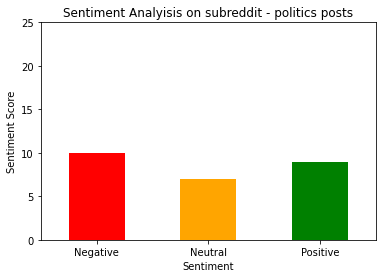

In [8]:
import matplotlib.pyplot as plt
colors = ['red', 'orange', 'green']
df1.plot( x = 'label', y = 'count', kind="bar", rot=0, color = colors, legend = None)
plt.title('Sentiment Analyisis on subreddit - politics posts')
plt.ylim(0,25)
plt.ylabel("Sentiment Score")
plt.xlabel("Sentiment")
plt.show()

In [9]:
#merged_df.groupby('subreddit').plot(subplots=True)

In [10]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [11]:
nltk.download('punkt');

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaishnaviputcha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
conda install -c conda-forge spacy-model-en_core_web_sm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [13]:
# import praw
# from praw.models import MoreComments
import datetime
import pandas as pd
import numpy as np
import re
import pprint
pd.options.mode.chained_assignment = None

from textblob import TextBlob

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import tokenize
#import spacy
#conda install -c conda-forge spacy-model-en_core_web_sm
#import en_core_web_sm
#nlp = en_core_web_sm.load()
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns

#import emoji

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaishnaviputcha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaishnaviputcha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaishnaviputcha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
data.head()

,ups,title,subreddit,url
0,39139,Marjorie Taylor Greene backs away from QAnon h...,politics,https://www.independent.co.uk/news/world/ameri...
1,32551,Gov. Greg Abbott said Texas 'desperately needs...,politics,https://www.businessinsider.com/greg-abbott-sa...
2,17978,If the Supreme Court strikes down student-loan...,politics,https://www.businessinsider.com/supreme-court-...
3,6297,Texas Democrat calls for US authorities to ext...,politics,https://thehill.com/policy/international/38048...
4,3935,Michigan attorney general re-opens criminal pr...,politics,https://www.cnn.com/2023/01/06/politics/michig...


In [15]:
#separate each comment into invididual sentences
data['title'] = [tokenize.sent_tokenize(item) 
                 for item in data.title]

In [16]:
#split each sentence into individual rows
data1 = data.explode("title").reset_index(drop = True)

In [17]:
data1.head()

,ups,title,subreddit,url
0,39139,Marjorie Taylor Greene backs away from QAnon h...,politics,https://www.independent.co.uk/news/world/ameri...
1,32551,Gov.,politics,https://www.businessinsider.com/greg-abbott-sa...
2,32551,Greg Abbott said Texas 'desperately needs more...,politics,https://www.businessinsider.com/greg-abbott-sa...
3,17978,If the Supreme Court strikes down student-loan...,politics,https://www.businessinsider.com/supreme-court-...
4,6297,Texas Democrat calls for US authorities to ext...,politics,https://thehill.com/policy/international/38048...


In [18]:
#define a function to obtain get polariy and subjectivity

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity 
    sentiment_subjectivity = blob.sentiment.subjectivity 
    if sentiment_polarity > 0:
        sentiment_label = "positive"
    elif sentiment_polarity < 0:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    #store result in a dictionary
    result = {"polarity": sentiment_polarity, 
             "subjectivity": sentiment_subjectivity,
             "sentiment": sentiment_label}
    return result 

In [19]:
#apply function and create new column to store result
data1["sentiment_result"] = data1.title.apply(get_sentiment)


In [20]:
data1.head()

,ups,title,subreddit,url,sentiment_result
0,39139,Marjorie Taylor Greene backs away from QAnon h...,politics,https://www.independent.co.uk/news/world/ameri...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
1,32551,Gov.,politics,https://www.businessinsider.com/greg-abbott-sa...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
2,32551,Greg Abbott said Texas 'desperately needs more...,politics,https://www.businessinsider.com/greg-abbott-sa...,"{'polarity': -0.075, 'subjectivity': 0.625, 's..."
3,17978,If the Supreme Court strikes down student-loan...,politics,https://www.businessinsider.com/supreme-court-...,"{'polarity': -0.12638888888888888, 'subjectivi..."
4,6297,Texas Democrat calls for US authorities to ext...,politics,https://thehill.com/policy/international/38048...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [21]:
#split result (stored as dictionary) into individual key columns 
sentiment = pd.json_normalize(data1["sentiment_result"])

In [22]:
df_1 = pd.concat([data1,sentiment], axis = 1)
df_1.head()

,ups,title,subreddit,url,sentiment_result,polarity,subjectivity,sentiment
0,39139,Marjorie Taylor Greene backs away from QAnon h...,politics,https://www.independent.co.uk/news/world/ameri...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,neutral
1,32551,Gov.,politics,https://www.businessinsider.com/greg-abbott-sa...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,neutral
2,32551,Greg Abbott said Texas 'desperately needs more...,politics,https://www.businessinsider.com/greg-abbott-sa...,"{'polarity': -0.075, 'subjectivity': 0.625, 's...",-0.075000,0.625000,negative
3,17978,If the Supreme Court strikes down student-loan...,politics,https://www.businessinsider.com/supreme-court-...,"{'polarity': -0.12638888888888888, 'subjectivi...",-0.126389,0.284722,negative
4,6297,Texas Democrat calls for US authorities to ext...,politics,https://thehill.com/policy/international/38048...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,neutral


In [23]:
#sentiment for each sentence
#df_sentence_summary = df_1[["title", "polarity", "subjectivity"]]
#df_sentence_summary.describe().style.apply(lambda x: ['background: lightyellow' if x.polarity > 0.08 \
                                                    # and x.polarity < 0.09 else '' for i in x], axis=1)

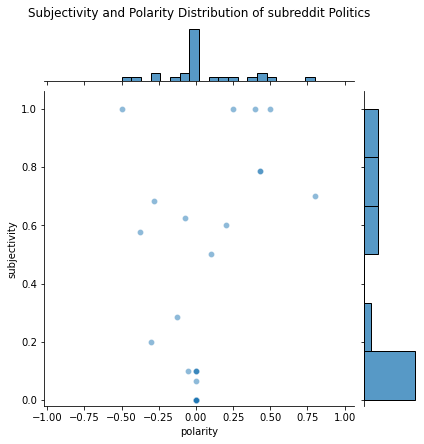

In [24]:
g = sns.jointplot(data = df_1, 
           x = "polarity", y = "subjectivity",
        kind = "scatter", alpha = 0.5)

g.ax_marg_x.set_xlim(-1.02, 1.06)
g.ax_marg_y.set_ylim(-0.02, 1.06)

plt.suptitle("Subjectivity and Polarity Distribution of subreddit Politics", y = 1.02, x = 0.47)
plt.show()